# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [1]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

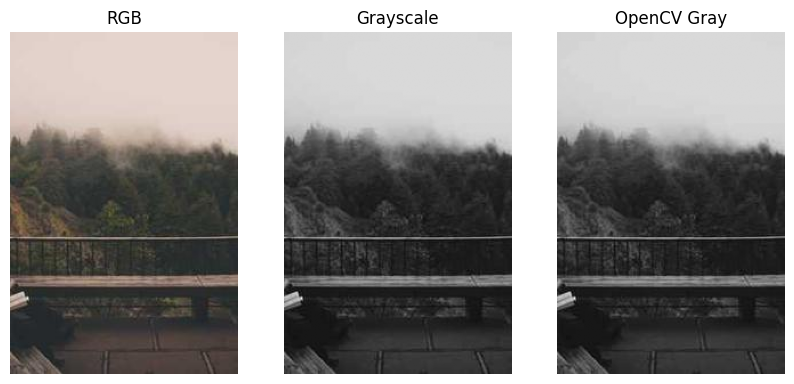

Shape of RGB Image: (300, 200, 3)
Shape of Grayscale Image: (300, 200)


Sample pixel(RGB) at [0,0]: [223 206 199]
Sample pixel(Grayscale) at [0,0]: 210.285
Sample pixel(OpenCV Gray) at [0,0] 210
Avg diff between methods: 0.401200


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import requests
from PIL import Image
from io import BytesIO

# Load Image from Picsum
url="https://picsum.photos/200/300"
resp=requests.get(url)
img_pil=Image.open(BytesIO(resp.content))

# Convert PIL_Img to Numpy arr
img_rgb=np.array(img_pil)
#Display in RGB;
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("RGB")
plt.axis("off")

#Convert to GrayScale-> Formula: Gray=0.299*R+0.587*G+0.114*B
r,g,b=img_rgb[:,:,0],img_rgb[:,:,1],img_rgb[:,:,2]
gray=0.299*r+0.587*g+0.114*b
plt.subplot(1,3,2)
plt.imshow(gray,cmap="gray")
plt.title("Grayscale")
plt.axis("off")

#Convert to Grayscale(OpenCV Implementation)
gray_cv2=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
plt.subplot(1,3,3)
plt.imshow(gray_cv2,cmap="gray")
plt.title("OpenCV Gray")
plt.axis("off")
plt.show()

#Compare Result & Print Shapes;
print(f"Shape of RGB Image: {img_rgb.shape}")
print(f"Shape of Grayscale Image: {gray.shape}")
print("\n")
print("Sample pixel(RGB) at [0,0]:", img_rgb[0,0])
print("Sample pixel(Grayscale) at [0,0]:", gray[0,0])
print("Sample pixel(OpenCV Gray) at [0,0]", gray_cv2[0,0])

#verify
diff=np.abs(gray.astype(int)- gray_cv2.astype(int))
print(f"Avg diff between methods: {np.mean(diff):4f}")


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [3]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

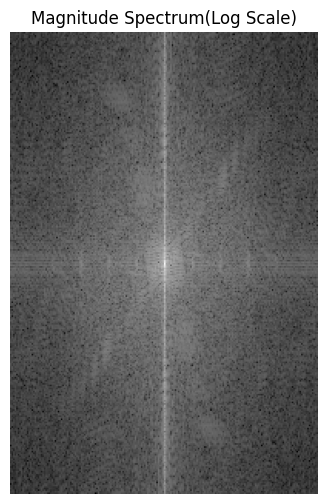

In [4]:
#Compute FFT(2D)
f=np.fft.fft2(gray)

#Shift zero freq component to centre
fshift=np.fft.fftshift(f)

#Magnitude Spectrum
mag=20*np.log(np.abs(fshift)+1)

#Phase Spectrum
phase=np.angle(fshift)

#Display Magnitude spectrum
plt.figure(figsize=(12,6))

#Plot Magnitude
plt.subplot(1,2,2)
plt.imshow(mag,cmap="gray")
plt.title("Magnitude Spectrum(Log Scale)")
plt.axis('off')
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [5]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

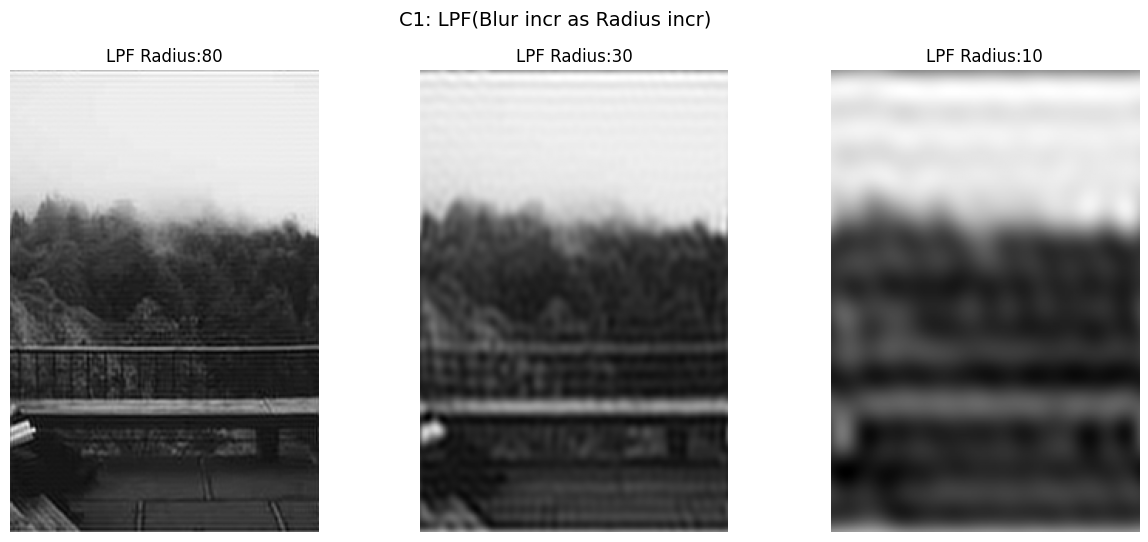

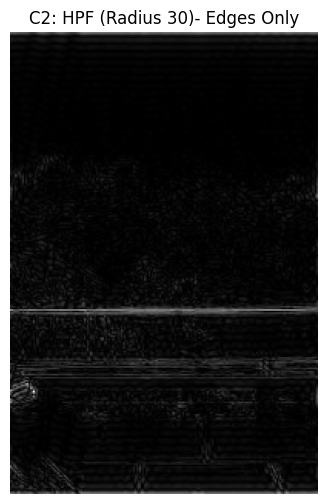

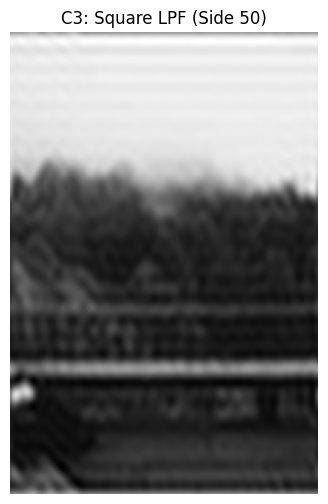

In [6]:
#Part C1: Circulat LPF
rows,cols=gray.shape
crow,ccol= rows//2, cols//2 #Centre

#will use a loop to handle the 3 radii efficiently
radii=[80,30,10] #Order Large r(Less blur)-> Small r(More blur)
plt.figure(figsize=(15,6))

for i, r in enumerate(radii):
 mask=np.zeros((rows,cols),np.uint8) #Create Mask
 cv2.circle(mask,(ccol,crow),r,1,-1)

 fshift_masked=fshift*mask #Apply Mask: Multiply FFT by mask

 f_ishift=np.fft.ifftshift(fshift_masked)  #Reconstruct: Shift Back
 img_back=np.fft.ifft2(f_ishift)
 img_back=np.abs(img_back)

 #Display
 plt.subplot(1,3,i+1)
 plt.imshow(img_back, cmap="gray")
 plt.title(f'LPF Radius:{r}')
 plt.axis('off')

#Reason for blur-> The centre of FFT contains low freq (smooth areas).
#The outer edges contain high freq(Sharp Details/edges).
#As radius decreases, we block more high-freq content, leaving only the smooth
# "avg" colors, resulting in a heavier blur.

plt.suptitle("C1: LPF(Blur incr as Radius incr)", fontsize=14)
plt.show()

#C2:HPF
r_hpf=30  #(Create Mask)
mask_hpf= np.ones((rows,cols), np.uint8)
cv2.circle(mask_hpf,(ccol,crow),r_hpf,0,-1)

#Apply & Reconstruct;
fshift_hpf= fshift*mask_hpf
f_ishift_hpf=np.fft.ifftshift(fshift_hpf)
img_back_hpf=np.abs(np.fft.ifft2(f_ishift_hpf))

plt.figure(figsize=(6,6))
plt.imshow(img_back_hpf, cmap="gray")
plt.title(f"C2: HPF (Radius {r_hpf})- Edges Only")
plt.axis('off')
plt.show()

#C3: Square LPF
mask_sq=np.zeros((rows,cols),np.uint8) #Create Mask
side=50
half_side=side//2

#Numply Slicing to create the sq, From(centre-25) to (centre+25)
mask_sq[crow-half_side: crow+half_side, ccol-half_side: ccol+half_side]=1

#Apply & Reconstruct
fshift_sq=fshift*mask_sq
f_ishift_sq=np.fft.ifftshift(fshift_sq)
img_back_sq=np.abs(np.fft.ifft2(f_ishift_sq))

plt.figure(figsize=(6,6))
plt.imshow(img_back_sq, cmap="gray")
plt.title("C3: Square LPF (Side 50)")
plt.axis('off')
plt.show()














## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [7]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

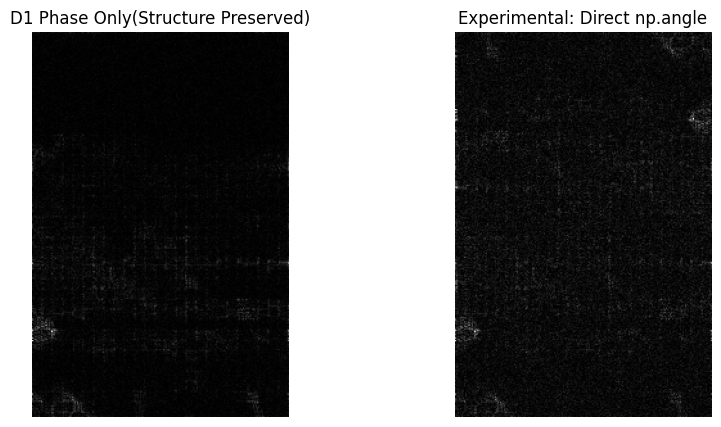

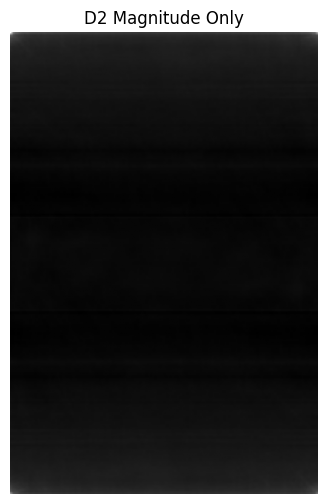

In [8]:
#D1 Phase-Only Reconstruction
#Standard way:Unit vectors(complex/mag)
ph_only=fshift/(np.abs(fshift)+1e-8)

#Reconstruct
ishift_ph=np.fft.ifftshift(ph_only)
rec_ph=np.abs(np.fft.ifft2(ishift_ph))

# Experimental: Using np.angle directly (Returns scalar radians, not complex)
# Diff: np.angle returns float values (e.g. 1.57), while the first method returns complex unit vectors.
ang_val=np.angle(fshift)
ishift_ang=np.fft.ifftshift(ang_val)
rec_ang=np.abs(np.fft.ifft2(ishift_ang))

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(rec_ph,cmap='gray')
plt.title("D1 Phase Only(Structure Preserved)")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rec_ang,cmap='gray')
plt.title("Experimental: Direct np.angle")
plt.axis('off')
plt.show()

#D2 Magnitude-Only Reconstruction
mag_only=np.abs(fshift)

#Reconstruct
ishift_mag=np.fft.ifftshift(mag_only)
rec_mag=np.abs(np.fft.ifft2(ishift_mag))

plt.figure(figsize=(6, 6))
plt.imshow(rec_mag,cmap='gray')
plt.title("D2 Magnitude Only")
plt.axis('off')
plt.show()


# COMMENTS ON MAGNITUDE SPECTRUM & LOG:
# 1. Why does D2 look different from the 'Magnitude Spectrum' we plotted earlier?
#  The 'Magnitude Spectrum' plot used a LOG transform (20*log(mag+1)). This compresses
#  the massive dynamic range (low freqs are 10^6 times stronger than high freqs) so
#  human eyes can see the details.
#  The reconstruction here uses the raw linear values. Since the low frequencies (DC component)
#  dominate mathematically, the image looks like a featureless blob or gradient.

# 2. Why is the image unrecognizable?
#   This proves that Phase carries the structural information (edges, shapes).
#   Magnitude only tells us the signal strength, not the spatial arrangement.

## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

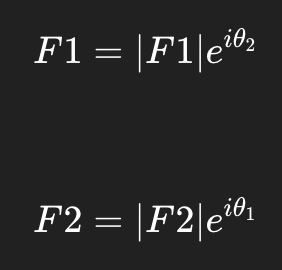

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [9]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

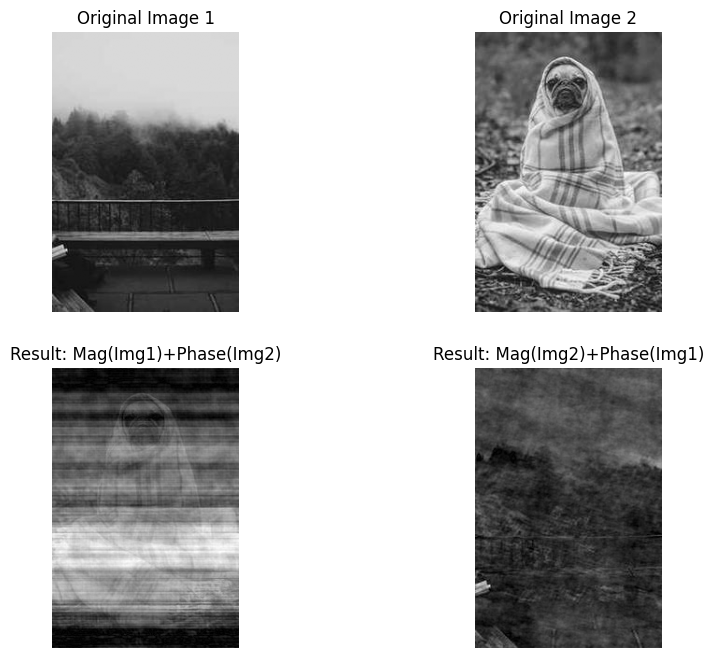

In [10]:
#Part E: Magnitude & Phase Swapping
import requests
from io import BytesIO

#Load 2nd Image(Different subject)
url2="https://picsum.photos/id/1025/200/300" #A dog usually
resp2=requests.get(url2)
img2_pil=Image.open(BytesIO(resp2.content)).convert('RGB')
img2=np.array(img2_pil)

#Preprocessing: Resize img2 to match img1(REQUIRED for swapping)
h,w=gray.shape
img2_gray=cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
img2_gray=cv2.resize(img2_gray, (w, h)) #Note cv2 uses(width,height)

#Compute FFTs
f1=np.fft.fft2(gray)
fshift1=np.fft.fftshift(f1)
mag1=np.abs(fshift1)
ph1=np.angle(fshift1)
f2=np.fft.fft2(img2_gray)
fshift2=np.fft.fftshift(f2)
mag2=np.abs(fshift2)
ph2=np.angle(fshift2)

# 4. Swap Formula: Z=Mag*e^(j * Phase)
# img1_new=Mag1 + Phase2
comb12=mag1*np.exp(1j*ph2)

# img2_new=Mag2+Phase1
comb21=mag2*np.exp(1j*ph1)

#Reconstruct
rec12=np.abs(np.fft.ifft2(np.fft.ifftshift(comb12)))
rec21=np.abs(np.fft.ifft2(np.fft.ifftshift(comb21)))

#Display
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.imshow(gray,cmap='gray')
plt.title("Original Image 1")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img2_gray,cmap='gray')
plt.title("Original Image 2")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(rec12,cmap='gray')
plt.title("Result: Mag(Img1)+Phase(Img2)")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(rec21,cmap='gray')
plt.title("Result: Mag(Img2)+Phase(Img1)")
plt.axis('off')
plt.show()


# OBSERVATION:
# The result "Mag(Img1) + Phase(Img2)" looks like Image 2!
# The result "Mag(Img2) + Phase(Img1)" looks like Image 1!

# Conclusion:
# Phase contains the structural info (where edges/shapes are).
# Magnitude contains the signal strength/texture (how bright/contrast-y it is).
# When we swap, the image takes the shape of whoever provided the PHASE.
